In [1]:
import pandas as pd
from sodapy import Socrata
import geopandas as gpd
import pandas as pd
import matplotlib as plt

In [2]:
#TOKEN
MyAppToken = "WMqBvB7MuZd4ruFvRrIIBLwBI"

client = Socrata("data.austintexas.gov", #website
                MyAppToken, #token from portal
                 username="miguelnovovillar@gmail.com", #username
                 password="GSJ6s9B!8977mPD") #password
MaxItems = 10000000

In [3]:
RoadConditions = pd.DataFrame.from_records(client.get("ypbq-i42h", limit = MaxItems,
                            select = 'id,sensor_id,location_name,location,timestamp,air_temp_secondary,temp_surface,condition_code_measured,friction_code_measured,dirty_lens_score,grip_text,relative_humidity,air_temp_tertiary',
                            where = 'timestamp > "2017-09-26"',
                            order = "timestamp"))

In [4]:
Latitude = []
Longitude = []

for i in range(RoadConditions.shape[0]):
    Longitude.append(RoadConditions.location[i]["coordinates"][0])
    Latitude.append(RoadConditions.location[i]["coordinates"][1])

In [5]:
RoadConditions = RoadConditions.assign(Latitude = Latitude, Longitude = Longitude).drop(['location'], axis = 1)

In [6]:
RoadConditions["timestamp"] = pd.to_datetime(RoadConditions.timestamp, utc=True)\
                                                                        .map(lambda x: x.tz_convert('America/Chicago'))#Convert to central time
# RoadConditions = RoadConditions.set_index('timestamp')

<AxesSubplot: title={'center': 'Number of measurements per day '}, xlabel='timestamp', ylabel='Cummulative measurements'>

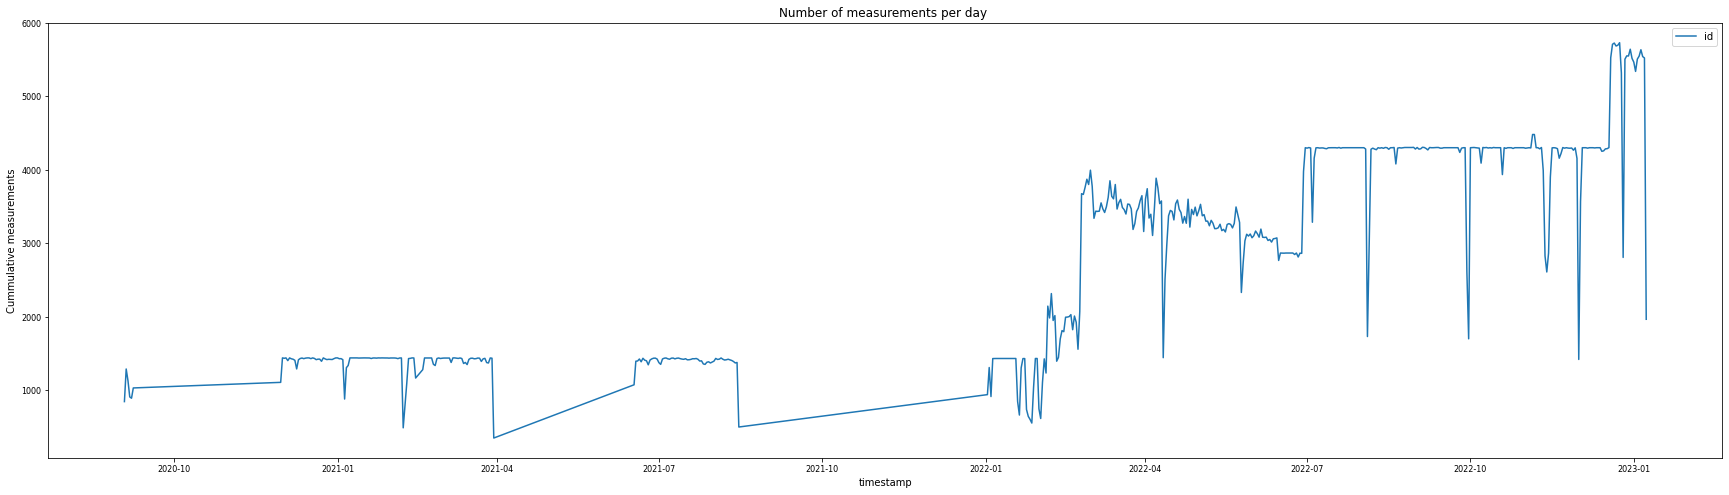

In [20]:
RoadConditions.groupby(RoadConditions["timestamp"].dt.date)["id"].count().plot(figsize=(30,8),
                                                                                title="Number of measurements per day ", 
                                                                                ylabel="Cummulative measurements", 
                                                                                fontsize = 8, 
                                                                                legend = True)

In [ ]:
#STORE
RoadConditions.to_csv("Road_Conditions_2021_2023x.csv")